# Optical Character Recognition (OCR) in Python
<br>
This repo contains the Optical Character Recognition (OCR) project as part of my data science portfolio. I have built an OCR to extract text from shopping receipts for further analysis, using two popular methods below:


1. [Tesseract-OCR](#tesseract)
2. [OCR.space](#space)

In [ ]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show pytesseract

Name: pytesseract
Version: 0.3.13
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: packaging, Pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import libraries
import pytesseract # OCR
from PIL import Image # read image

In [ ]:
# set the path to the directory where you install the Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytesseract"

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/lib/python3.10/dist-packages/pytesseract'

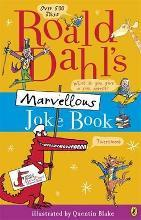

In [ ]:
# open the image to make sure you are reading the correct image
img = Image.open("/Users/s.ywg91/Desktop/0000024.jpg")

# rotate the image if necessary
# img = img.rotate(270, expand=True)

# view the image
img

In [ ]:
# extract text from image
result = pytesseract.image_to_string("/Users/s.ywg91/Desktop/0000024.jpg")

TesseractNotFoundError: /usr/local/lib/python3.10/dist-packages/pytesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
# see the result
print(result)

In [ ]:
pip install keras-ocr

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()
images = [keras_ocr.tools.read('/Users/s.ywg91/Desktop/0000024.jpg')]
predictions = pipeline.recognize(images)
print(predictions)

In [ ]:
pip install easyocr

In [ ]:
import easyocr

# Initialize the reader
reader = easyocr.Reader(['en'])

# Read the text from the image
result = reader.readtext("/Users/s.ywg91/Desktop/0000024.jpg")

# Extract only the text strings
extracted_strings = [item[1] for item in result]

In [ ]:
# Print the strings
print(extracted_strings)

In [ ]:
import easyocr
import os

# Initialize the easyocr reader
reader = easyocr.Reader(['en'])

# List of image paths
image_paths = [
    "Desktop/IAT 360/Final Project/dataset/images/Children_Books",
    "Desktop/IAT 360/Final Project/dataset/images/Craft_Hobbies",
    "Desktop/IAT 360/Final Project/dataset/images/Food_Drink",
    "Desktop/IAT 360/Final Project/dataset/images/Thrillers",
    "Desktop/IAT 360/Final Project/dataset/images/Travel",
]

# Corresponding output file paths
output_paths = [
    "Desktop/IAT 360/Final Project/dataset/labels/Children_Books_output.txt",
    "Desktop/IAT 360/Final Project/dataset/labels/Craft_Hobbies_output.txt",
    "Desktop/IAT 360/Final Project/dataset/labels/Food_Drink_output.txt",
    "Desktop/IAT 360/Final Project/dataset/labels/Thrillers_output.txt",
    "Desktop/IAT 360/Final Project/dataset/labels/Travel_output.txt",
]

# Loop through each directory and corresponding output file
for image_path, output_path in zip(image_paths, output_paths):
    image_count = 0  # Reset counter for each directory

    # Open the output file for writing
    with open(output_path, "w") as output_file:
        # Loop through each image file in the directory
        for image_file in os.listdir(image_path):
            if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                # Full path to the image
                image = os.path.join(image_path, image_file)

                # Run easyocr on the image
                result = reader.readtext(image)

                # Collect all the text from the result and join it as a single line
                strings = [item[1] for item in result]
                line = " ".join(strings)  # Join with a space to keep words readable

                # Write the concatenated line to the file
                output_file.write(line + "\n")

                # Increment the counter and stop after 100 images
                image_count += 1
                if image_count >= 100:
                    break

Class labels dictionary:

In [ ]:
class_labels = {
    0: "Children",
    1: "Craft",
    2: "Food",
    3: "Thrillers",
    4: "Travel"
}

In [36]:
import numpy as np
import glob

df = {'text': [],
      'label': []}

# Define label mapping based on file names
label_mapping = {
  'Children_Books_output.txt': 0,
  'Craft_Hobbies_output.txt': 1,
  'Food_Drink_output.txt': 2,
  'Thrillers_output.txt': 3,
  'Travel_output.txt': 4
}

x = []
count = 0

for file in glob.glob('Desktop/IAT 360/Final Project/dataset/labels/*.txt'):
  # Extract the file name
  file_name = file.split('/')[-1]  # Adjust based on your OS path separator
  label = label_mapping.get(file_name)  # Get the corresponding label

  # Open each file to extract data content
  with open(file, 'r') as f:
      file_content = f.read().splitlines()

  # Append text and label to the df dictionary
  for content in file_content:
      df['text'].append(content)  # Keep the text as-is
      df['label'].append(label)   # Assign the label based on the file

  count += 1

# Convert labels to a numpy array if needed
x = np.array(df['label'])  # Only labels, if required

In [37]:
import pandas as pd
all_df = pd.DataFrame(df)
all_df

,text,label
0,An Eye Dallaauhnllor JD ROBB VENDETTA IN DEATH,3
1,ApSeDIUP MICHAEL CONNELLY THE BURNING ROOM bul...,3
2,Michael Robotham The Suspect,3
3,LOUISE PENNY NATURE of the BEAST,3
4,CRIME PUNISHMFNT Oennna DOSTOYEvSKY Ula4 Rn Ai...,3
...,...,...
495,Original BLOOD TYPE DIET EAI RIGHT FAR YOUR TY...,2
496,cook BAKER,2
497,Foop; WTF Shouid EAT Brmarkhyman,2
498,Artisan VEGAN CHEESE,2


In [38]:
import pandas as pd
from datasets import Dataset

# Convert the DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(all_df)

# Display the dataset
print(dataset)

Dataset({
    features: ['text', 'label'],
    num_rows: 500
})


In [39]:
# install some Python packages with pip

!pip install numpy torch datasets transformers evaluate --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [40]:
# let's check the version we are using

!pip freeze | grep -E '^numpy|^torch|^datasets|^transformers|^evaluate'

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


datasets==3.1.0
evaluate==0.4.3
numpy==1.26.4
torch==2.5.0
torchvision==0.20.0
transformers==4.46.3


In [41]:
dataset = dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)

In [42]:
# Split the 'test' dataset into validation and test subsets
validation_test_split = dataset['test'].train_test_split(test_size=50, seed=42, shuffle=True)

# Add the new splits to the dataset dictionary
dataset['val'] = validation_test_split['train']
dataset['test'] = validation_test_split['test']

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})


In [43]:
from transformers import AutoTokenizer

checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [44]:
# tokenize the text in batches with truncation and padding based on BERT requirements

def tokenization(example):
    return tokenizer(example['text'], truncation=True, padding=True)

tokenized_dataset = dataset.map(tokenization, batched=True, remove_columns=['text'])
tokenized_dataset

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    val: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

In [45]:
import evaluate
import numpy as np

# we setup the training to evaluate the accuracy and f1 scores

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='micro')
    return {**accuracy, **f1}

In [46]:
pip install transformers accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install 'accelerate>=0.26.0'

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [52]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# get bert model with a sequence classification head for sentiment analysis
# source: (https://huggingface.co/distilbert-base-uncased)
checkpoint = 'distilbert-base-uncased'
num_labels = 5
id2label = {0:'Children', 1:'Craft', 2:'Food', 3:'Thrillers', 4: 'Travel'}
label2id = {'Children':0, 'Craft':1, 'Food':2, 'Thrillers':3, 'Travel': 4}
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id)

# setup custom training arguments
# 1. store training checkpoints to 'results' output directory
# 2. fine-tune for just 1 epoch
# 3,4. use 16 as a batch size to speed things up
# 5. evaluate validation set every 500 steps (this is the default steps)
# 6. load the best model based on the lowest validation loss at the end of training
training_args = TrainingArguments(
    seed=42,
    output_dir = './results',
    num_train_epochs = 3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='steps',
    load_best_model_at_end=True,
)

# setup trainer with custom metrics (accuracy, f1)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    compute_metrics=compute_metrics,
)

# disable wandb logging (a v4 huggingface artifact)
os.environ['WANDB_DISABLED']= "true"

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [53]:
# let's first evaluate unfine-tuned model with test set

trainer.evaluate(tokenized_dataset['test'])

{'eval_loss': 1.6313978433609009,
 'eval_model_preparation_time': 0.0018,
 'eval_accuracy': 0.12,
 'eval_f1': 0.12,
 'eval_runtime': 0.3341,
 'eval_samples_per_second': 149.653,
 'eval_steps_per_second': 11.972}

In [54]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=75, training_loss=0.9491295369466146, metrics={'train_runtime': 16.467, 'train_samples_per_second': 72.873, 'train_steps_per_second': 4.555, 'total_flos': 14282405496000.0, 'train_loss': 0.9491295369466146, 'epoch': 3.0})

In [55]:
trainer.evaluate(tokenized_dataset['test'])

{'eval_loss': 0.8093414902687073,
 'eval_model_preparation_time': 0.0018,
 'eval_accuracy': 0.76,
 'eval_f1': 0.76,
 'eval_runtime': 0.224,
 'eval_samples_per_second': 223.194,
 'eval_steps_per_second': 17.856,
 'epoch': 3.0}

In [67]:
pip install torch torchvision torchaudio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [68]:
from transformers import pipeline
import torch
torch.cuda.is_available()

False

In [56]:
from transformers import pipeline
import torch

# get current device with pytorch
device = torch.cuda.current_device()

# create pipeline for sentiment classifier with custom model and tokenizer
sentiment_classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer, device=device)

AssertionError: Torch not compiled with CUDA enabled


***
# <a name="space">OCR.space</a>

OCR.space is a free OCR API which provides a simple way of parsing images and multi-page PDF documents (PDF OCR) and getting the extracted text results returned in a JSON format. The API can be used from any internet-connected device (desktop, mobile, iPhone, Android, Windows phone, refrigerator etc). The OCR API has three tiers/levels. Registration is required to use the free tier with the OCR API key. It has a rate limit of 500 requests within one day per IP address to prevent accidental spamming.

In [ ]:
# use the code from the documentation page

import requests


def ocr_space_file(filename, overlay=False, api_key="API_KEY", language="eng"):
    """ OCR.space API request with local file.
        Python3.5 - not tested on 2.7
    :param filename: Your file path & name.
    :param overlay: Is OCR.space overlay required in your response.
                    Defaults to False.
    :param api_key: OCR.space API key.
                    Defaults to "helloworld".
    :param language: Language code to be used in OCR.
                    List of available language codes can be found on https://ocr.space/OCRAPI
                    Defaults to "en".
    :return: Result in JSON format.
    """

    payload = {"isOverlayRequired": overlay,
               "apikey": api_key,
               "language": language,
               }
    with open(filename, "rb") as f:
        r = requests.post("https://api.ocr.space/parse/image",
                          files={filename: f},
                          data=payload,
                          )
    return r.content.decode()


In [ ]:
# send the image for text extraction
test_file = ocr_space_file(filename="receipt.jpg")

In [ ]:
# parse the extracted text from the JSON response
import json
d = json.loads(test_file)
parsed_text = d['ParsedResults'][0]['ParsedText']

In [ ]:
# see the result
print(parsed_text)

BILLION SHOPPING CENTRE 
(SEMENYIH) SDN.BHD, 
CO. REG 656574-X 
NO, 16366 TEKNOLOGI KAJANG, 
JALAN SEMENY1h(, 43500 SEMENYIH, SELANGOR 
Tel: 03-8724 3221 
Invoice No 
BSMY1907020004295 
410983(LIDYA AINA BT MIZAN) 
295 
11/03/2019 20 
004 
NESTIJM 31M ORIGINAL 28GX15 
9556001205674 U 
lxlO.90 
10,90 
0.00 
10.90 
10.90 
SubTota I 
Item I 
Spec,Disc 
Qty I 
Roundin 
Saving 0.00 
Totaq 
Master 
Change 
THANK YOU. PLEASE COME AGAIN. 
GOODS SOLD ARE NOT RETURNABLE 
0.00 



***
# Ending Note
This is a simple project to build an OCR to extract text from shopping receipts. There are other interesting applications as well, such as extracting text from medical reports for further analysis. It is part of the Data Collection / Acquisition process in the overall Data Science Workflow. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References
- https://github.com/tesseract-ocr/tesseract/wiki
- https://github.com/UB-Mannheim/tesseract/wiki
- https://stackoverflow.com/questions/34225927/pytesseract-cannot-find-the-file-specified/35830452
- https://grimhacker.com/2014/11/23/installing-pytesseract-practically-painless/
- https://medium.com/@MicroPyramid/extract-text-with-ocr-for-all-image-types-in-python-using-pytesseract-ec3c53e5fc3a